Input variables:

**bank client data:**  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')   
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  

**related with the last contact of the current campaign:**  
8 - contact: contact communication type (categorical: 'cellular','telephone')     
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). **Important note:** this attribute highly affects the output target (e.g., if duration=0 then y='no').   
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

**social and economic context attributes**
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

In [167]:
import pandas as pd

df_raw = pd.read_csv("bank.csv", delimiter=";")
df = df_raw
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Our target is `y`, which is "yes" when the client agreed to sign the contract with the bank, "no" otherwise.
Goal:
* Find what makes people say yes
* Create a predictor that, given a client situation, will predict weither the client will agree to the contract or not.

Read the first cell of this Notebook where variables are described.
It is said that `duration` should only be used for benchmark purpose, so we need to discard it

In [168]:
df = df.drop('duration', axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no


# Using LabelEncoder on columns that needs it

In [169]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


Only the columns with numerical data were processed by `df.describe()`. Let's use it to get the list of the columns that needs processing.

In [170]:
numerical_columns = set(df.describe().columns)
numerical_columns

{'age', 'balance', 'campaign', 'day', 'pdays', 'previous'}

In [171]:
columns_to_encode = list(set(df.columns) - numerical_columns)
columns_to_encode

['education',
 'contact',
 'month',
 'job',
 'default',
 'loan',
 'poutcome',
 'y',
 'housing',
 'marital']

In [172]:
from sklearn.preprocessing import LabelEncoder

# We keep each column encoder in a list in order to inverse_transform later if we need it.
columns_encoders = []

for col in columns_to_encode:
    tmp_encoder = LabelEncoder()
    tmp_encoder.fit(df[col])
    df[col] = tmp_encoder.transform(df[col])
    columns_encoders.append(tmp_encoder)

In [173]:
for column, encoder in zip(columns_to_encode, columns_encoders):
    print(column, encoder.classes_)

education ['primary' 'secondary' 'tertiary' 'unknown']
contact ['cellular' 'telephone' 'unknown']
month ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
default ['no' 'yes']
loan ['no' 'yes']
poutcome ['failure' 'other' 'success' 'unknown']
y ['no' 'yes']
housing ['no' 'yes']
marital ['divorced' 'married' 'single']


We "automatized" the process of labelling but it's important to take a look at the result.

Here, it looks like the different values are okay.

But in Titanic project, it would not be ok to have a label for each Cabin, it would be too much values and thus noise.

# Analyse correlations

In [174]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,0.160706,-0.094352,-0.059114,0.073714,-0.011244


Let's take a specific look at our target `y`

Our goal is to find the values that are the farthest from 0

In [175]:
df.corr()['y'].apply(lambda x: x if x > 0 else -x).sort_values(ascending=False)

y            1.000000
contact      0.133595
previous     0.116714
housing      0.104683
pdays        0.104087
poutcome     0.082632
loan         0.070517
campaign     0.061147
age          0.045092
education    0.042987
month        0.040933
job          0.027401
balance      0.017905
marital      0.015042
day          0.011244
default      0.001303
Name: y, dtype: float64

<AxesSubplot:>

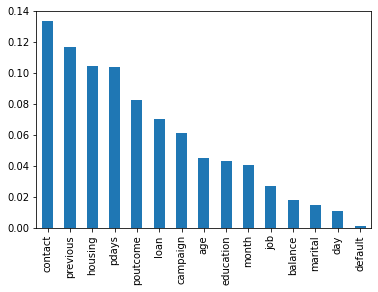

In [176]:
# Plot the values (without y)
df.corr()['y'].apply(lambda x: x if x > 0 else -x).sort_values(ascending=False)[1:].plot.bar()

It looks like the most important features (in order to predict the target) are:
* Contact
* Previous
* Housing
* PDays
* Poutcome
* Loan
* Campaign

Let's visualize how they help determine the target

### Contact

In [177]:
# Method 1 : use the encoders to inverse_transform values

def df_inverse_transform(columns):
    new_df = pd.DataFrame()
    for col in columns:
        index = columns_to_encode.index(col)
        encoder = columns_encoders[index]
        values = encoder.inverse_transform(df[col])
        new_df[col] = values
    return new_df.reset_index()
        
tmp = df_inverse_transform(['contact', 'y'])
tmp

,index,contact,y
0,0,cellular,no
1,1,cellular,no
2,2,cellular,no
3,3,unknown,no
4,4,unknown,no
...,...,...,...
4516,4516,cellular,no
4517,4517,unknown,no
4518,4518,cellular,no
4519,4519,cellular,no


In [178]:
tmp.groupby(['contact', 'y']).count()

index
contact   y         
cellular  no    2480
          yes    416
telephone no     257
          yes     44
unknown   no    1263
          yes     61

In [179]:
print(416/(2480+416)*100)
print(44/(44+257)*100)
print(61/(61+1263)*100)

14.3646408839779
14.61794019933555
4.607250755287009


We see that the client has more chance of saying 'no' when the contact is unknown

### Previous

number of contacts performed before this campaign and for this client 

In [180]:
# Method2: Just keep the DataFrame untouched from the processed DataFrame

df_raw[['previous', 'y']].reset_index().groupby(['previous', 'y']).count()

index
previous y         
0        no    3368
         yes    337
1        no     235
         yes     51
2        no     143
         yes     50
3        no      91
         yes     22
4        no      53
         yes     25
5        no      34
         yes     13
6        no      16
         yes      9
7        no      19
         yes      3
8        no      15
         yes      3
9        no       7
         yes      3
10       no       2
         yes      2
11       no       3
12       no       4
         yes      1
13       no       1
14       yes      2
15       no       1
17       no       1
18       no       1
19       no       1
20       no       1
22       no       1
23       no       1
24       no       1
25       no       1

In [181]:
# Here, we use a custom function to compute the %age of total yes/no contained in each combination

df_raw[['previous', 'y']].reset_index().groupby(['previous', 'y']).apply(lambda x: 
                                                                         round(len(x['index']) / len(df_raw) * 100, 2))

previous  y  
0         no     74.50
          yes     7.45
1         no      5.20
          yes     1.13
2         no      3.16
          yes     1.11
3         no      2.01
          yes     0.49
4         no      1.17
          yes     0.55
5         no      0.75
          yes     0.29
6         no      0.35
          yes     0.20
7         no      0.42
          yes     0.07
8         no      0.33
          yes     0.07
9         no      0.15
          yes     0.07
10        no      0.04
          yes     0.04
11        no      0.07
12        no      0.09
          yes     0.02
13        no      0.02
14        yes     0.04
15        no      0.02
17        no      0.02
18        no      0.02
19        no      0.02
20        no      0.02
22        no      0.02
23        no      0.02
24        no      0.02
25        no      0.02
dtype: float64

We see that the client has more chance of saying yes if they have been contacted only once.

### Housing

has housing loan?

In [182]:
df_raw[['housing', 'y']].reset_index().groupby(['housing', 'y']).count()

index
housing y         
no      no    1661
        yes    301
yes     no    2339
        yes    220

In [183]:
print(301/(301+1661)*100)
print(220/(2339+220)*100)

15.341488277268095
8.597108245408362


Here, we see there is more chance of saying 'yes' if the client does not have an housing loan.

### pdays

number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [184]:
x = df_raw[['pdays', 'y']].reset_index().groupby(['pdays', 'y']).count().reset_index()
x.head(15)

,pdays,y,index
0,-1,no,3368
1,-1,yes,337
2,1,yes,2
3,2,no,7
4,3,no,1
5,5,no,1
6,7,no,3
7,28,no,1
8,38,yes,1
9,56,yes,1


# Train

* Contact
* Previous
* Housing
* PDays
* Poutcome
* Loan
* Campaign

In [185]:
features = ['contact', 'previous', 'housing', 'pdays', 'poutcome', 'loan', 'campaign']
X = df[features]
X.shape

(4521, 7)

In [186]:
y = df['y']
y.shape

(4521,)

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [188]:
def get_best_clf(classifiers, print_best=True):
    top_clf = []
    for clf in classifiers:
        clf = clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        top_clf.append((acc, clf))  ## add the tuple (accuracy, algorithm) in the list

    top_clf.sort(reverse=True)  # trie en ordre décroissant
    if print_best:
        [print(clf) for clf in top_clf]
    return top_clf[0][1]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

classifiers = [
    MLPClassifier(max_iter=300),
    KMeans(n_clusters=2),
    DecisionTreeClassifier(),
    SVC()
]

best_clf = get_best_clf(classifiers)